Import Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

Read csv files and add new Columns

In [3]:
euro_50 = pd.read_csv("euro50.csv")
sp_500 = pd.read_csv("sp500.csv")

euro_50['Date'] = pd.to_datetime(euro_50['Date'], utc=True)
euro_50.insert(1, "DayWeek", 0)
euro_50.insert(2, "Month", 0)
euro_50.insert(3, "Year", 0)
euro_50.insert(4, "Ror", 0)

sp_500['Date'] = pd.to_datetime(sp_500['Date'], utc=True)
sp_500.insert(1, "DayWeek", 0)
sp_500.insert(2, "Month", 0)
sp_500.insert(3, "Year", 0)
sp_500.insert(4, "Ror", 0)

Add Date infomations

In [ ]:
for index, row in euro_50.iterrows():
    euro_50["Year"][index] = euro_50["Date"][index].year
    euro_50["Month"][index] = euro_50["Date"][index].month
    euro_50["DayWeek"][index] = euro_50["Date"][index].day_of_week
    euro_50["Ror"][index] =  float((euro_50["Close"][index] - euro_50["Open"][index]) / euro_50["Open"][index])
    
for index, row in sp_500.iterrows():
    sp_500["Year"][index] = sp_500["Date"][index].year
    sp_500["Month"][index] = sp_500["Date"][index].month
    sp_500["DayWeek"][index] = sp_500["Date"][index].day_of_week
    sp_500["Ror"][index] =  float((sp_500["Close"][index] - sp_500["Open"][index]) / sp_500["Open"][index])

Monthly percentage return (intended over 20 trading days) and annual (intended over 252 trading days), divided by index

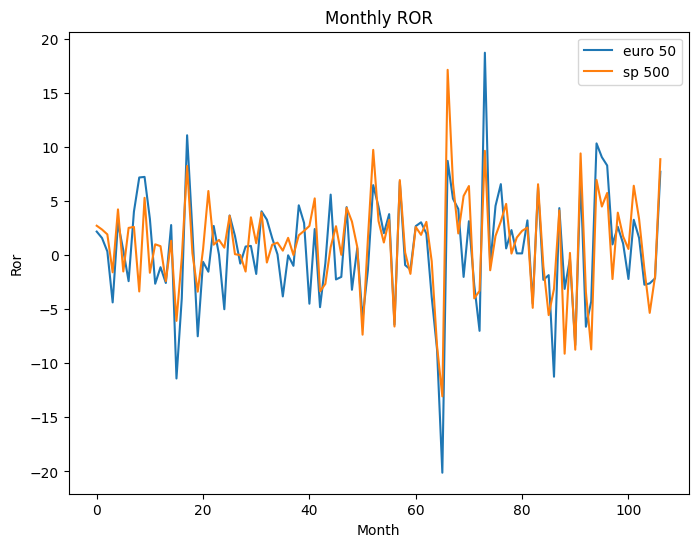

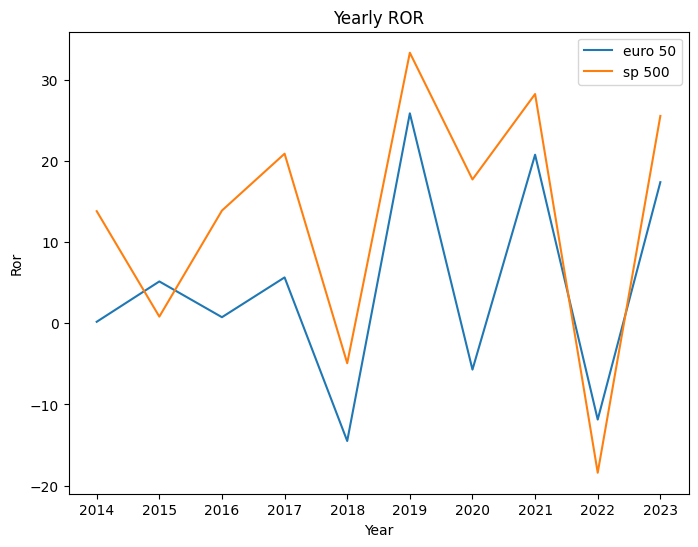

In [9]:
ror_month_euro_50 = []
ror_year_euro_50 = []
ror_month_sp_500 = []
ror_year_sp_500 = []

for index_year in range(11):
    
    """
    Annual Percentage Return
    """
    
    euro_50_Filtered = euro_50[euro_50['Year'] == index_year + 2013]
    euro_50_Filtered = euro_50_Filtered.reset_index(drop=True)
        
    if len(euro_50_Filtered) > 0:
            
        dim = len(euro_50_Filtered) - 1
        ror_act = float(100 * (euro_50_Filtered["Close"][dim] - euro_50_Filtered["Open"][0]) / euro_50_Filtered["Open"][0])
        ror_year_euro_50.append(ror_act)
            
    sp_500_Filtered = sp_500[sp_500['Year'] == index_year + 2013]
    sp_500_Filtered = sp_500_Filtered.reset_index(drop=True)
        
    if len(sp_500_Filtered) > 0:
            
        dim1 = len(sp_500_Filtered) - 1
        ror_act = float(100 * (sp_500_Filtered["Close"][dim1] - sp_500_Filtered["Open"][0]) / sp_500_Filtered["Open"][0])
        ror_year_sp_500.append(ror_act)
    
    
    for index_month in range(12):
        
        """
        Montly Percentage Return
        """
        
        euro_50_Filtered = euro_50[(euro_50['Month'] == index_month) & (euro_50['Year'] == index_year + 2013)]
        euro_50_Filtered = euro_50_Filtered.reset_index(drop=True)
        
        if len(euro_50_Filtered) > 0:
            
            dim = len(euro_50_Filtered) - 1
            ror_act = float(100 * (euro_50_Filtered["Close"][dim] - euro_50_Filtered["Open"][0]) / euro_50_Filtered["Open"][0])
            ror_month_euro_50.append(ror_act)
            
        sp_500_Filtered = sp_500[(sp_500['Month'] == index_month) & (sp_500['Year'] == index_year + 2013)]
        sp_500_Filtered = sp_500_Filtered.reset_index(drop=True)
        
        if len(sp_500_Filtered) > 0:
            
            dim1 = len(sp_500_Filtered) - 1
            ror_act = float(100 * (sp_500_Filtered["Close"][dim1] - sp_500_Filtered["Open"][0]) / sp_500_Filtered["Open"][0])
            ror_month_sp_500.append(ror_act)
        

"""
Montly Plot    
"""

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel('Month')
ax.set_ylabel('Ror')
ax.set_title('Monthly ROR')


rect1, = ax.plot(ror_month_euro_50, label = "euro 50")
rect2, = ax.plot(ror_month_sp_500, label = "sp 500")

ax.legend()


"""
Yearly Plot    
"""

fig1, ax1 = plt.subplots(figsize=(8,6))
values = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

ax1.set_xlabel('Year')
ax1.set_ylabel('Ror')
ax1.set_title('Yearly ROR')

rect1_1 = ax1.plot(values, ror_year_euro_50, label = "euro 50")
rect2_1 = ax1.plot(values, ror_year_sp_500, label = "sp 500")
ax1.legend()

plt.show()

Average daily return divided by index and day of the week

[0.00066553, 0.00082529, -0.00054725, -4.277e-05, nan, nan, -0.00044667]
[0.00059428, -0.00029728, 0.00026018, 0.00045651, 0.00018292, nan, nan]


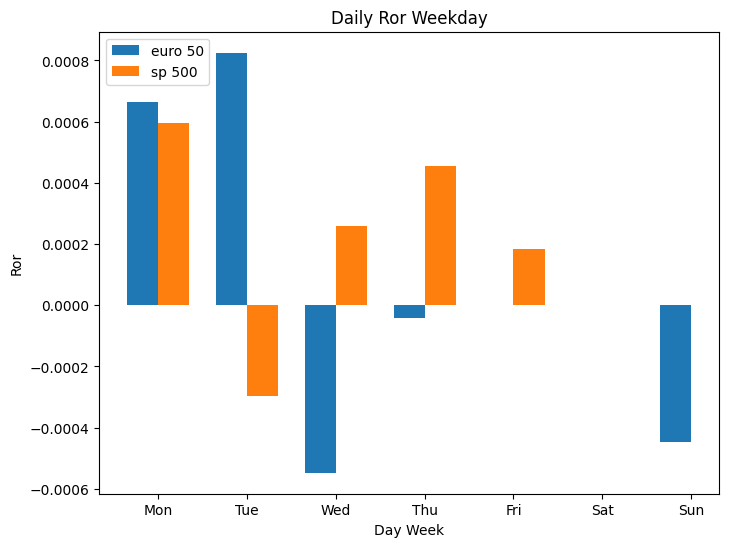

In [16]:
ror_dayweek_euro_50_mean = []
ror_dayweek_sp_500_mean = []

for index  in range(7):
    euro_50_Filtered = euro_50[(euro_50['DayWeek'] == index)]
    sp_500_Filtered = sp_500[(sp_500['DayWeek'] == index)]
    ror_dayweek_euro_50_mean.append(round(euro_50_Filtered["Ror"].mean(), 8))
    ror_dayweek_sp_500_mean.append(round(sp_500_Filtered["Ror"].mean(), 8))

print(ror_dayweek_euro_50_mean)    
print(ror_dayweek_sp_500_mean)  

"""
Plot    
"""

xval = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
yval_euro_50 = ror_dayweek_euro_50_mean
yval_sp_500 = ror_dayweek_sp_500_mean

x = np.arange(len(xval))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel('Day Week')
ax.set_ylabel('Ror')
ax.set_title('Daily Ror Weekday')
ax.set_xticks(x, xval)

rect1 = ax.bar(x - width/2, yval_euro_50, width, label = "euro 50")
rect2 = ax.bar(x + width/2, yval_sp_500, width, label = "sp 500")

ax.legend()

plt.show()


Identify the day with the highest daily return and the lowest return, distinguished between the two indices

In [11]:
# euro50 
act_ror_bigger = euro_50["Ror"][0]
act_ror_lower = euro_50["Ror"][0]

for index, row in euro_50.iterrows():
    act_ror = euro_50["Ror"][index]
    
    if act_ror > act_ror_bigger:
        act_ror_bigger = act_ror
        act_ror_bigger_date = euro_50["Date"][index]
    
    if act_ror < act_ror_lower:
        act_ror_lower = act_ror
        act_ror_lower_date = euro_50["Date"][index]

string_date_low_euro50 = act_ror_lower_date.strftime("%d-%m-%Y")
string_date_high_euro50 = act_ror_bigger_date.strftime("%d-%m-%Y")

print(f"il giorno con il rendimento peggiore per euro50 è {string_date_low_euro50} con un rendimento di {round(act_ror_lower, 4)}")
print(f"il giorno con il rendimento migliore per euro50 è {string_date_high_euro50} con un rendimento di {round(act_ror_bigger, 4)}")

# sp500 
act_ror_bigger = sp_500["Ror"][0]
act_ror_lower = sp_500["Ror"][0]

for index, row in sp_500.iterrows():
    act_ror = sp_500["Ror"][index]
    
    if act_ror > act_ror_bigger:
        act_ror_bigger = act_ror
        act_ror_bigger_date = sp_500["Date"][index]
    
    if act_ror < act_ror_lower:
        act_ror_lower = act_ror
        act_ror_lower_date = sp_500["Date"][index]
        
string_date_low_sp_500 = act_ror_lower_date.strftime("%d-%m-%Y")
string_date_high_sp_500 = act_ror_bigger_date.strftime("%d-%m-%Y")

print(f"il giorno con il rendimento peggiore per sp_500 è {string_date_low_sp_500} con un rendimento di {round(act_ror_lower, 4)}")
print(f"il giorno con il rendimento migliore per sp_500 è {string_date_high_sp_500} con un rendimento di {round(act_ror_bigger, 4)}")

il giorno con il rendimento peggiore per euro50 è 11-03-2020 con un rendimento di -0.1172
il giorno con il rendimento migliore per euro50 è 23-03-2020 con un rendimento di 0.0827
il giorno con il rendimento peggiore per sp_500 è 20-03-2020 con un rendimento di -0.0566
il giorno con il rendimento migliore per sp_500 è 13-10-2022 con un rendimento di 0.048


Calculate the average daily volume of the two indices

In [13]:
mean_euro_50 = euro_50["Volume"].mean()
mean_sp_500_df = sp_500["Volume"].mean()

print(f"la media giornaliera per l'indice euro_50:  {round(mean_euro_50, 2)}") 
print(f"la media giornaliera per l'indice sp_500_df {round(mean_sp_500_df, 2)}") 

la media giornaliera per l'indice euro_50:  41934439.53
la media giornaliera per l'indice sp_500_df 91289037.89
